<a href="https://colab.research.google.com/github/yuki-2000/Image_processing_lecture/blob/main/IP2022_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### 初期設定（このセルの中身は触らなくて良い）
import numpy as np # 数値解析パッケージnumpyのimport
import cv2 # 画像処理パッケージopencvのimport
import matplotlib.pyplot as plt # 描画パッケージmatplotlibのimport
import imutils

# Google Colab固有の設定
from google.colab import files
from google.colab.patches import cv2_imshow

# Google driveのmount
from google.colab import drive
drive.mount('/content/drive/')
# Google Colab用directoryに移動
%cd "/content/drive/MyDrive/Colab Notebooks/画像処理/"



Mounted at /content/drive/
/content/drive/MyDrive/Colab Notebooks/画像処理


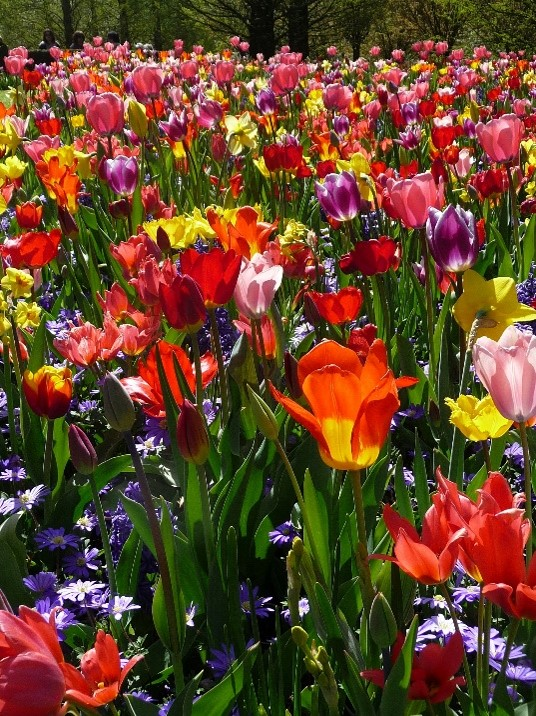

In [ ]:
### 1-1: 画像の読込と表示（このセルの中身は触らなくて良い）
img = imutils.url_to_image('https://bit.ly/3ED08Rd')

# 読み込めなかった場合の例外処理
if img is None:
  print('Image file not found.')

# 画像の表示
cv2_imshow(img)

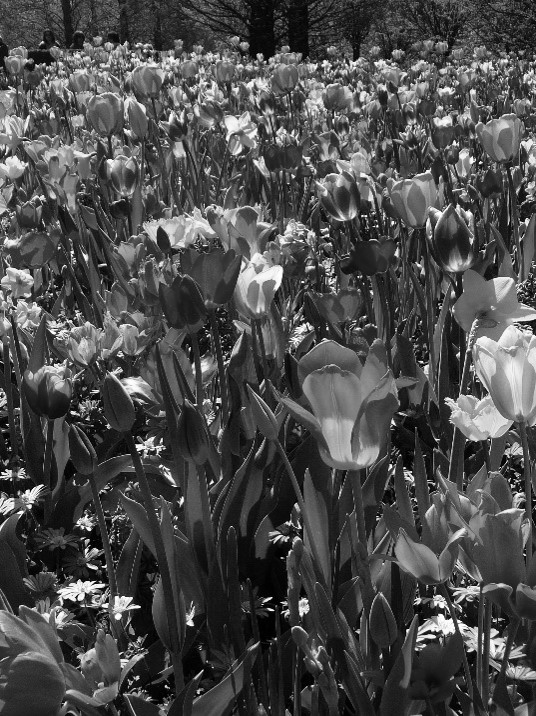

In [ ]:
### 1-2: 色空間の変換，画像の書き出し（このセルの中身は触らなくて良い）
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 画像の表示
cv2_imshow(gray_img)

Scale


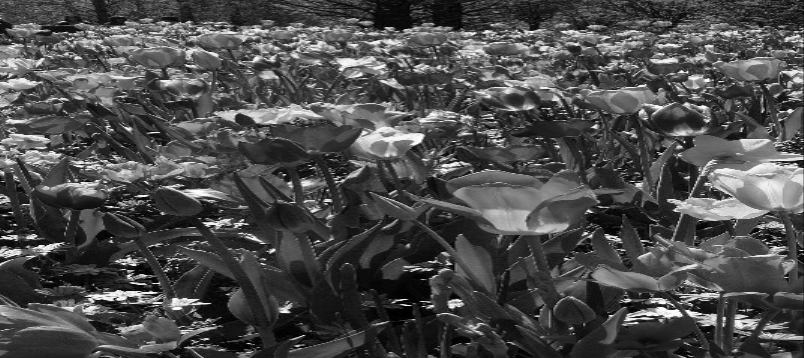

[[  0.70710678   0.70710678 -84.64884502]
 [ -0.70710678   0.70710678 331.63961031]]
Rotation


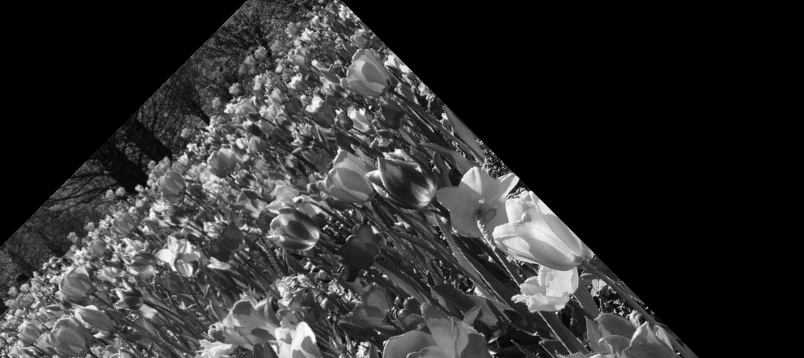

Sheer


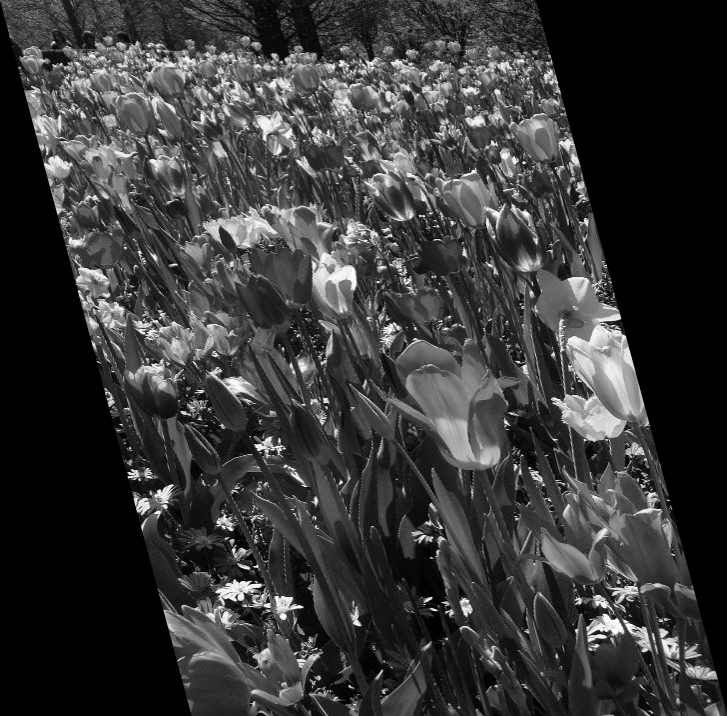

Translation


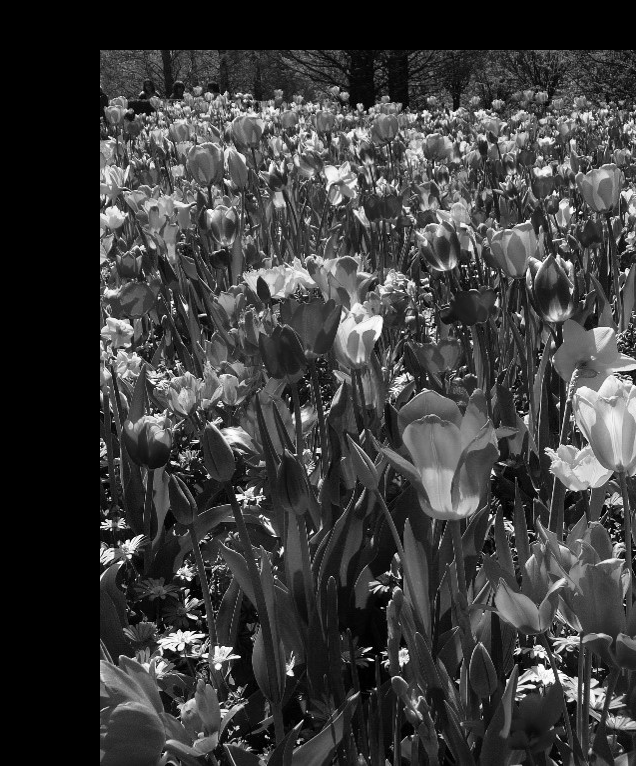

In [ ]:
### 3-1: アフィン変換
rows, cols = gray_img.shape


# 拡縮・反転
affine_matrix = np.float32([[1.5,0,0],[0,0.5,0]])
img_scale = cv2.warpAffine(gray_img,
                           affine_matrix,
                           (int(cols*1.5),int(rows*0.5))                  
                           )
print("Scale")
cv2_imshow(img_scale)

# 回転
affine_matrix = cv2.getRotationMatrix2D((rows/2,cols/2),
                                        45,
                                        1,)
img_rotation = cv2.warpAffine(gray_img,
                           affine_matrix,
                           (int(cols*1.5),int(rows*0.5))                  
                           )
print(affine_matrix)
print("Rotation")
cv2_imshow(img_rotation)

# 剪断
affine_matrix = np.float32([[1,np.tan(np.radians(15)),0],[0,1,0]])
img_sheer = cv2.warpAffine(gray_img,
                           affine_matrix,
                           (cols+int(rows*np.tan(np.radians(15))),rows))                  
                           

print("Sheer")
cv2_imshow(img_sheer)


# 平行移動
affine_matrix = np.float32([[1,0,100],[0,1,50]])
img_translation = cv2.warpAffine(gray_img,
                           affine_matrix,
                           (cols+100,rows+50)                  
                           )

print("Translation")
cv2_imshow(img_translation)